In [1]:
%matplotlib inline
import numpy as np
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as mtick

import matplotlib.animation as animation

In [2]:
START = "2021-01-01"
END = "2025-01-01"
TICKER = "^GSPC"
TITLE = TICKER + " - " +(datetime.now()).strftime("%Y-%m-%d - %H:%M:%S")

In [3]:
data = pd.read_csv("data.csv",index_col=0)

# data = yf.download(TICKER,start=START, end=END,multi_level_index=False)

data["log_return"] = np.log(data["Close"] / data["Close"].shift(1))
data["high_log_return"] = np.log(data["High"] / data["High"].shift(1))
data["low_log_return"] = np.log(data["Low"] / data["Low"].shift(1))
data["open_log_return"] = np.log(data["Open"] / data["Open"].shift(1))

data["cum_log_return"] = data["log_return"].cumsum()
data["cum_high_log_return"] = data["high_log_return"].cumsum()
data["cum_low_log_return"] = data["low_log_return"].cumsum()
data["cum_open_log_return"] = data["open_log_return"].cumsum()

data.dropna(inplace=True)
data.drop(columns=["Volume"],inplace=True)

data.index = pd.to_datetime(data.index)

In [4]:
data

,Open,High,Low,Close,Adj Close,log_return,high_log_return,low_log_return,open_log_return,cum_log_return,cum_high_log_return,cum_low_log_return,cum_open_log_return
Date,,,,,,,,,,,,,
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,0.007511,-0.001367,0.005635,-0.003361,0.007511,-0.001367,0.005635,-0.003361
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,-0.011714,-0.008666,-0.003505,-0.000161,-0.004203,-0.010034,0.002130,-0.003523
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,0.022584,0.017158,0.001876,-0.004272,0.018381,0.007124,0.004006,-0.007795
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,-0.000768,0.011297,0.021003,0.022615,0.017613,0.018422,0.025009,0.014820
2023-01-10,3888.570068,3919.830078,3877.290039,3919.250000,3919.250000,0.006954,-0.007812,-0.003381,-0.005706,0.024567,0.010610,0.021629,0.009114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,5984.629883,6040.100098,5981.439941,6040.040039,6040.040039,0.010982,0.010293,0.013274,0.007443,0.457077,0.442982,0.455153,0.440267
2024-12-26,6024.970215,6049.750000,6007.370117,6037.589844,6037.589844,-0.000406,0.001596,0.004326,0.006718,0.456671,0.444579,0.459479,0.446985
2024-12-27,6006.169922,6006.169922,5932.950195,5970.839844,5970.839844,-0.011117,-0.007230,-0.012465,-0.003125,0.445554,0.437349,0.447014,0.443860


In [5]:
def ichimoku(data_):
    data_["tenkan"] = ((data_["cum_high_log_return"].rolling(9).max()) + (data_["cum_low_log_return"].rolling(9).min())) / 2
    data_["kijin"] = ((data_["cum_high_log_return"].rolling(26).max()) + (data_["cum_low_log_return"].rolling(26).min())) / 2
    data_["chikou"] = data_["cum_log_return"].shift(-26)
    data_["span_a"] = (((data_["tenkan"] + data_["kijin"])) / 2).shift(26)
    data_["span_b"] = (((data_["cum_high_log_return"].rolling(52).max()) + (data_["cum_low_log_return"].rolling(52).min())) / 2).shift(26)
    return data

In [6]:
data_ichi = ichimoku(data)[-50:]
# data_ichi *= 100

C:\Users\olive\AppData\Local\Temp\ipykernel_26404\290862931.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


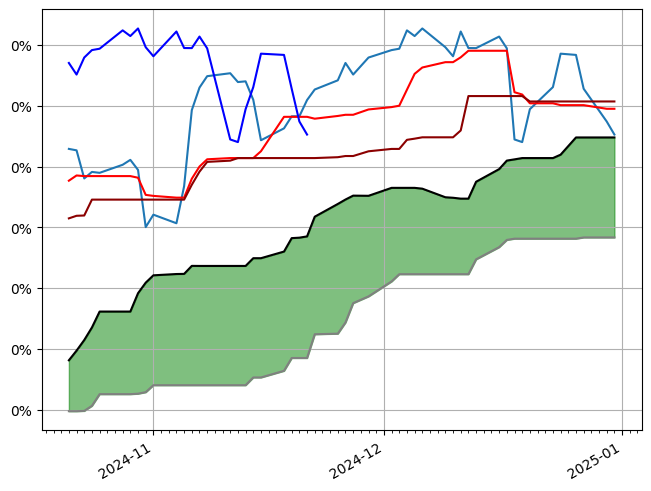

In [7]:
fig, ax1 = plt.subplots(layout='constrained')

price = ax1.plot(data_ichi["cum_log_return"], label="Close")[0]
conv = ax1.plot(data_ichi["tenkan"], label="Conversion line", color="red")[0]
base = ax1.plot(data_ichi["kijin"], label="Base line", color="darkred")[0]
lagged = ax1.plot(data_ichi["chikou"], label="26 lag", color="blue")[0]
fast = ax1.plot(data_ichi["span_a"], label="Fast cloud",color="black")[0]
slow = ax1.plot(data_ichi["span_b"], label="Slow cloud",color="grey")[0]

plt.fill_between(data_ichi.index,data_ichi["span_a"],data_ichi["span_b"],data_ichi["span_a"] > data_ichi["span_b"],color="green",alpha=0.5)
plt.fill_between(data_ichi.index,data_ichi["span_b"],data_ichi["span_a"],data_ichi["span_a"] < data_ichi["span_b"],color="red",alpha=0.5)

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
# ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
# ax1.xaxis.set_major_locator(mdates.YearLocator())

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.DayLocator())
fig.autofmt_xdate()

ax1.grid(True)
# ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

fig.show()

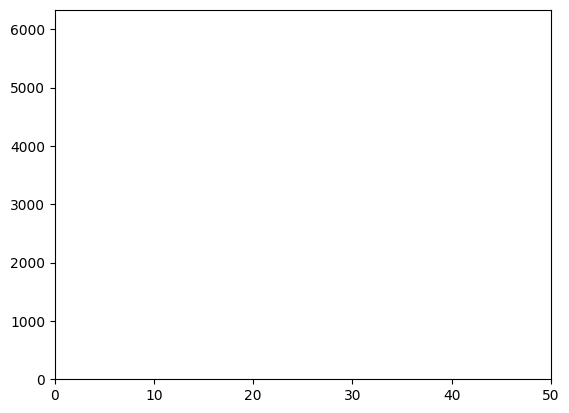

In [ ]:
fig, ax1 = plt.subplots()

dg = data_ichi["Close"]

price, = ax1.plot(0,0)

x_data = []
y_data = []

ax1.set_xlim(0, len(dg))
ax1.set_ylim(0, dg.max() * 1.04)

# Animation update function
def update(frame):
    x_data.append(dg.index[frame])
    y_data.append(dg.iloc[frame])

    price.set_xdata(x_data)
    price.set_ydata(y_data)
    return price,

    plt.cla()
    plt.tight_layout()

In [9]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(data_ichi),  # Number of frames (matches DataFrame length)
    blit=True,        # Optimize for static backgrounds
    interval=20       # Delay between frames in milliseconds
)
Writer = animation.writers['pillow']
writer = Writer(fps=15, bitrate=1000)
ani.save('animation/lines3.gif', writer=writer)

5853.97998046875
5853.97998046875
5853.97998046875
5853.97998046875
5851.2001953125
5797.419921875
5809.85986328125
5808.1201171875
5823.52001953125
5832.919921875
5813.669921875
5705.4501953125
5728.7998046875
5712.68994140625
5782.759765625
5929.0400390625
5973.10009765625
5995.5400390625
6001.35009765625
5983.990234375
5985.3798828125
5949.169921875
5870.6201171875
5893.6201171875
5916.97998046875
5917.10986328125
5948.7099609375
5969.33984375
5987.3701171875
6021.6298828125
5998.740234375
6032.3798828125
6047.14990234375
6049.8798828125
6086.490234375
6075.10986328125
6090.27001953125
6052.85009765625
6034.91015625
6084.18994140625
6051.25
6051.08984375
6074.080078125
6050.60986328125
5872.16015625
5867.080078125
5930.85009765625
5974.06982421875
6040.0400390625
6037.58984375
5970.83984375
5906.93994140625
5881.6298828125
